In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils.extmath import softmax
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../src')  # Go one level up and then into src
from SMF import SMF_BCD
from SMF_torch import smf

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = X.values  ### Uncomment this line if you are having type errors in plotting. It is loading as a pandas dataframe, but our indexing is for numpy array. 
X = X / 255.

print('X.shape', X.shape)
print('y.shape', y.shape)

'''
Each row of X is a vectroization of an image of 28 x 28 = 784 pixels.  
The corresponding row of y holds the true class label from {0,1, .. , 9}.
'''

X.shape (70000, 784)
y.shape (70000,)


'\nEach row of X is a vectroization of an image of 28 x 28 = 784 pixels.  \nThe corresponding row of y holds the true class label from {0,1, .. , 9}.\n'

In [3]:
### Change the dimension of y for SMF_BCD
y_matrix = np.zeros((9, y.shape[0]))
for i in range(y.shape[0]):
    label = int(y[i])
    if label == 0:
        continue
    else:
        y_matrix[label-1, i] = 1

print(y_matrix.shape)

### Scale the input data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X= scaler.transform(X)

print(X.shape)

(9, 70000)
(70000, 784)


In [11]:
n_components = 16

SMF_Train = SMF_BCD([X.T, y_matrix], X_test=[X.T, y_matrix], xi= 5, n_components=n_components)

results_dict = SMF_Train.fit(iter=100, subsample_size=None,# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=False, if_validate=False, threshold=0.5)

initial loading beta [[ 0.30815359 -0.30704043 -0.38553589  0.23371987 -0.0486593  -0.52095119
  -0.58197799 -0.61989209  0.75228549  0.41670653  0.03906393 -0.54048513
  -0.7101305   0.58977092 -0.70331644 -0.0727552  -0.78461987]
 [-0.05582155  0.36156801  0.23771448  0.57010296  0.6202126  -0.1810127
   0.76158727 -0.9278494  -0.21690311 -0.14356024 -0.57794765  0.11263846
  -0.55243501 -0.01149191  0.94337698  0.71915423 -0.62883437]
 [ 0.07143658  0.81647487  0.93691278  0.16210382 -0.96613792 -0.34855626
   0.84283989 -0.93386318  0.60265039 -0.51272679  0.30116107  0.95946964
   0.61553166  0.43792858 -0.02494385  0.58660505 -0.03378915]
 [-0.89854057  0.28277637  0.53779503  0.82665692 -0.68804588 -0.95948101
   0.6520975  -0.52682207 -0.73023075  0.52270129 -0.29450067 -0.22754849
   0.08561138 -0.17850743  0.4324544   0.64695795 -0.97001804]
 [ 0.79442365 -0.24450781  0.61058449 -0.53579021  0.8383386   0.07864629
  -0.35705032 -0.00418369 -0.54943111 -0.04510242  0.61410549 

  0%|          | 0/100 [00:01<?, ?it/s]
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:132: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:180: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:249: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:1309: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:1630: SyntaxWarning: invalid escape sequence '\h'
  '''


KeyboardInterrupt: 

In [6]:
W = results_dict.get('loading')[0]
beta= results_dict.get('loading')[1]
H = results_dict.get('code')

In [7]:
n = np.random.randint(0, 70000, size=100)
X_test = np.ones((X.shape[1], 100))
y_test = np.ones(shape=100)
for i in range(100):
    X_test[:, i] = X.T[:, n[i]]
    y_test[i] = y[n[i]]

p = np.zeros((100, 9))
for i in range(100):
    normalizer = 1 + np.sum(np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]))
    p[i] = (np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]) / normalizer).T


acc = 0
for j in range(100):
    prob = np.max(p[j])
    number = np.argmax(p[j]) + 1
    if (1 - np.sum(p[j])) > prob:
        number = 0
    if y_test[j] == number:
        acc += 1

print(f"The accuracy rate: {acc/100}")


The accuracy rate: 0.89


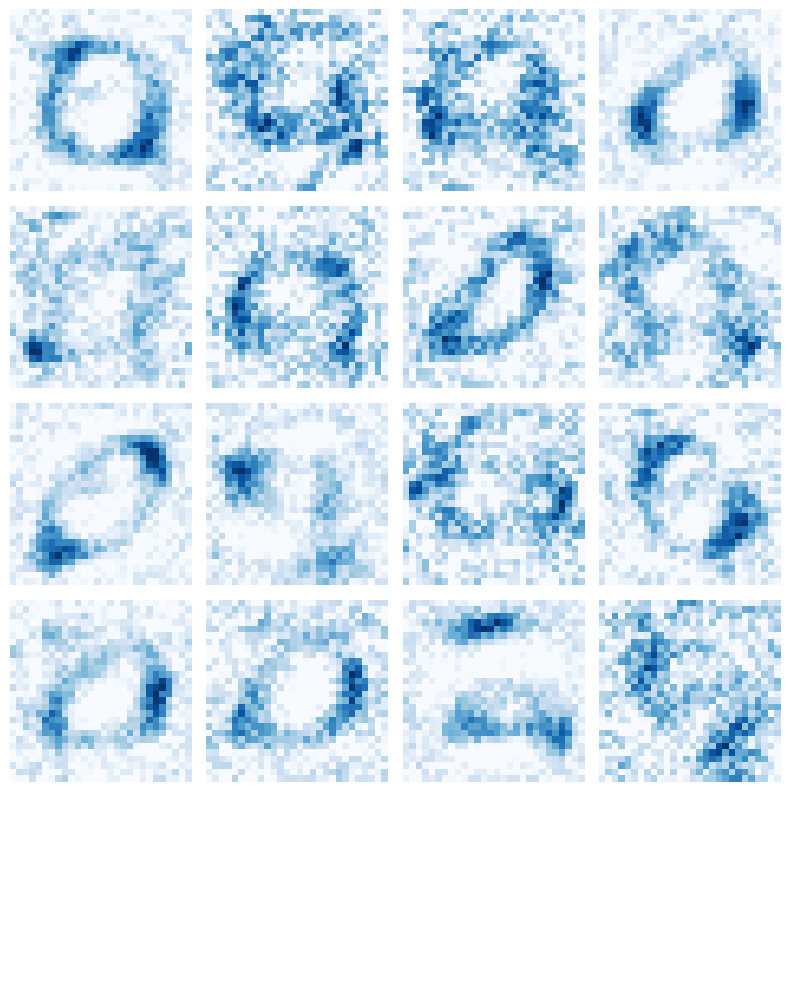

In [8]:
image = np.zeros((n_components, 28, 28))
for i in range(n_components):
    image[i] = W[:, i].reshape(28,28)

images_per_row = 4
n_rows = len(image) // images_per_row + 1

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=images_per_row, figsize=(images_per_row * 2, n_rows * 2))

for i, ax in enumerate(axes.flat):
    if i < n_components:
        # Reshape and display each component as an image
        ax.imshow(image[i], cmap='Blues')  # Use gray scale color map
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide axes for empty subplots

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("MINIST")

# Display the plot if needed
plt.show()

In [9]:
print(beta.T[0])

[-7.22198584  0.52877577  0.46643904 -0.56537472  1.2111951  -1.04214415
 -1.68602497  1.36777505 -0.94840377]


# Torch Version

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.autograd import Variable

"""
#data = pd.read_csv('../Data/Pancreatic_GSE16515.csv')
data = pd.read_csv('../Data/Breast_GSE70947.csv')

print(data.shape)
y = data['type'].values
y = [1 if y[i] == 'breast_adenocarcinoma' else 0 for i in range(len(y))]
y = np.array(y)
X = data.drop(columns=['samples', 'type']).values
X = (X - np.mean(X, axis = 0))/(100*np.std(X, axis = 0)) # normalization
"""


hidden_size = 2

Accuracy = []
test_size = 0.5

X_train, X_test, Y_train, Y_test = train_test_split(X, y_matrix.T, test_size=test_size, random_state=2)
# print(X_train.shape)
# print(Y_train.shape)

X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(Y_train)).long()
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(Y_test)).long()
# print(f"y_train's ndim: {y_train.ndim}")
# print(f"y_test: {y_test.shape}")

smf_model = smf(X_train, y_train, hidden_size, device='cuda')
smf_model.fit(num_epochs=10000,
               lr_classification=0.01,
               lr_matrix_factorization=0.01,
               xi=1,
               initialize='spectral',
               W_nonnegativity=True,
               H_nonnegativity=True,
               test_data=[X_test, y_test],
               record_recons_error=True)
Accuracy.append(smf_model.test(X_test, y_test))

y_test: torch.Size([35000, 9])
--- Iteration -1: Training loss --- [Data, Label, Total] = [20611333.985233.3, 1685240257.653736.3, 1705851591.638969.3]
Epoch [10/10000],Loss_Classification: 1.6877 Loss_MF: 0.7806
mythre= 0.5
Test accuracy = 0.9280063492063492, Test confusion_mx = [[279904   3547]
 [ 19131  12418]]
